In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Earthquake-prediction-using-Machine-learning-models-main\Dataset\Earthquake_Data.csv", delimiter=r'\s+')

# read_csv argument to load date_time column ---> ''', parse_dates=['Date(YYYY/MM/DD)']'''

df.sample(10)

,Date(YYYY/MM/DD),Time,Latitude,Longitude,Depth,Mag,Magt,Nst,Gap,Clo,RMS,SRC,EventID
13446,1994/09/13,07:33:11.26,38.8042,-119.7117,3.91,3.27,Md,28,213,85,0.05,NCSN,30057288
997,1972/02/25,10:09:46.36,36.6177,-121.2253,5.33,3.07,Md,20,64,2,0.04,NCSN,-1009430
13444,1994/09/13,06:59:41.33,38.7242,-119.7703,1.31,3.13,Md,24,203,80,0.10,NCSN,30057285
17869,2007/03/28,16:33:24.02,41.6907,-126.3347,5.15,3.26,Md,18,314,234,0.20,NCSN,71004227
14687,1997/09/21,12:36:27.11,41.5983,-126.2373,0.78,4.38,Md,67,294,192,0.15,NCSN,521969
16188,2001/04/09,16:49:08.50,41.0805,-123.4223,38.93,3.15,Md,27,51,22,0.08,NCSN,21157563
860,1971/12/28,22:57:03.66,36.6887,-121.3172,4.90,4.49,Md,35,68,3,0.09,NCSN,-1008587
6725,1982/12/19,09:38:49.15,35.8455,-120.3962,6.83,3.03,Md,35,55,1,0.07,NCSN,-1083252
11564,1992/04/25,18:48:47.71,40.3170,-124.5250,5.09,3.89,Md,12,264,20,0.04,NCSN,267848
2915,1975/02/03,18:50:25.36,36.5942,-121.1930,4.76,3.35,Md,19,58,2,0.04,NCSN,-1022745


In [3]:
# Check for missing values
print(df.isnull().sum())

# Handling missing values (if any)
data = df.dropna()  # or use other imputation methods

Date(YYYY/MM/DD)    0
Time                0
Latitude            0
Longitude           0
Depth               0
Mag                 0
Magt                0
Nst                 0
Gap                 0
Clo                 0
RMS                 0
SRC                 0
EventID             0
dtype: int64


In [4]:
new_column_names = ["Date(YYYY/MM/DD)",  "Time(UTC)", "Latitude(deg)", "Longitude(deg)", "Depth(km)", "Magnitude(ergs)", 
                    "Magnitude_type", "No_of_Stations", "Gap", "Close", "RMS", "SRC", "EventID"]

df.columns = new_column_names
ts = pd.to_datetime(df["Date(YYYY/MM/DD)"] + " " + df["Time(UTC)"])
df = df.drop(["Date(YYYY/MM/DD)", "Time(UTC)"], axis=1)
df.index = ts
display(df)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,SRC,EventID
1966-07-01 09:41:21.820,35.9463,-120.4700,12.26,3.20,Mx,7,171,20,0.02,NCSN,-4540462
1966-07-02 12:08:34.250,35.7867,-120.3265,8.99,3.70,Mx,8,86,3,0.04,NCSN,-4540520
1966-07-02 12:16:14.950,35.7928,-120.3353,9.88,3.40,Mx,8,89,2,0.03,NCSN,-4540521
1966-07-02 12:25:06.120,35.7970,-120.3282,9.09,3.10,Mx,8,101,3,0.08,NCSN,-4540522
1966-07-05 18:54:54.360,35.9223,-120.4585,7.86,3.10,Mx,9,161,14,0.04,NCSN,-4540594
...,...,...,...,...,...,...,...,...,...,...,...
2007-12-19 12:14:09.620,34.1438,-116.9822,7.03,4.06,ML,10,73,14,0.08,NCSN,40207706
2007-12-21 12:14:56.450,37.3078,-121.6735,8.47,3.08,ML,114,45,5,0.12,NCSN,51192926
2007-12-23 21:43:43.540,37.2127,-117.8230,10.00,3.54,ML,45,176,40,0.07,NCSN,51193070
2007-12-28 01:59:42.400,36.5292,-121.1133,5.99,3.04,ML,70,45,4,0.06,NCSN,51193343


In [5]:
# Drop 'SRC' Column
data = df.drop(columns=['SRC'])

In [6]:
#Save Pre Processed Column's Excel
file_name = 'Earthquake_data_processed.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18030 entries, 1966-07-01 09:41:21.820000 to 2007-12-28 23:20:28.120000
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Latitude(deg)    18030 non-null  float64
 1   Longitude(deg)   18030 non-null  float64
 2   Depth(km)        18030 non-null  float64
 3   Magnitude(ergs)  18030 non-null  float64
 4   Magnitude_type   18030 non-null  object 
 5   No_of_Stations   18030 non-null  int64  
 6   Gap              18030 non-null  int64  
 7   Close            18030 non-null  int64  
 8   RMS              18030 non-null  float64
 9   EventID          18030 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 1.5+ MB


# EDA

*Basic Data Description Stats*

In [8]:
data.describe().iloc[:, 1:-1]

,Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS
count,18030.000000,18030.000000,18030.000000,18030.000000,18030.000000,18030.000000,18030.000000
mean,-120.921935,8.876301,3.427692,31.943150,147.555851,28.965225,0.142098
std,2.341440,7.698564,0.437849,24.535714,90.675337,42.751417,0.807726
min,-127.507000,0.000000,3.000000,4.000000,12.000000,0.000000,0.000000
25%,-122.004325,4.860000,3.110000,14.000000,66.000000,4.000000,0.050000
50%,-121.080700,7.070000,3.300000,26.000000,127.000000,10.000000,0.080000
75%,-118.862000,10.590000,3.600000,43.000000,230.000000,34.000000,0.120000
max,-112.107200,121.310000,7.390000,327.000000,354.000000,296.000000,45.400000


**Feature Selection Techniques**

In [9]:
data.sample(5)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),Magnitude_type,No_of_Stations,Gap,Close,RMS,EventID
1973-03-02 23:12:12.590,36.7630,-120.8910,2.47,3.09,Md,7,309,22,0.07,-1014746
1981-02-28 07:46:34.310,37.5998,-118.8615,6.97,3.43,Md,9,100,3,0.04,-1060850
1984-05-03 13:02:51.430,37.2780,-121.6508,8.75,3.20,ML,95,29,3,0.05,17394
1979-11-09 17:46:58.790,37.5943,-118.9588,12.59,4.00,ML,50,158,70,0.24,-1048733
1980-07-05 09:13:36.940,36.0803,-120.6375,5.18,3.10,ML,43,49,4,0.08,-1054243


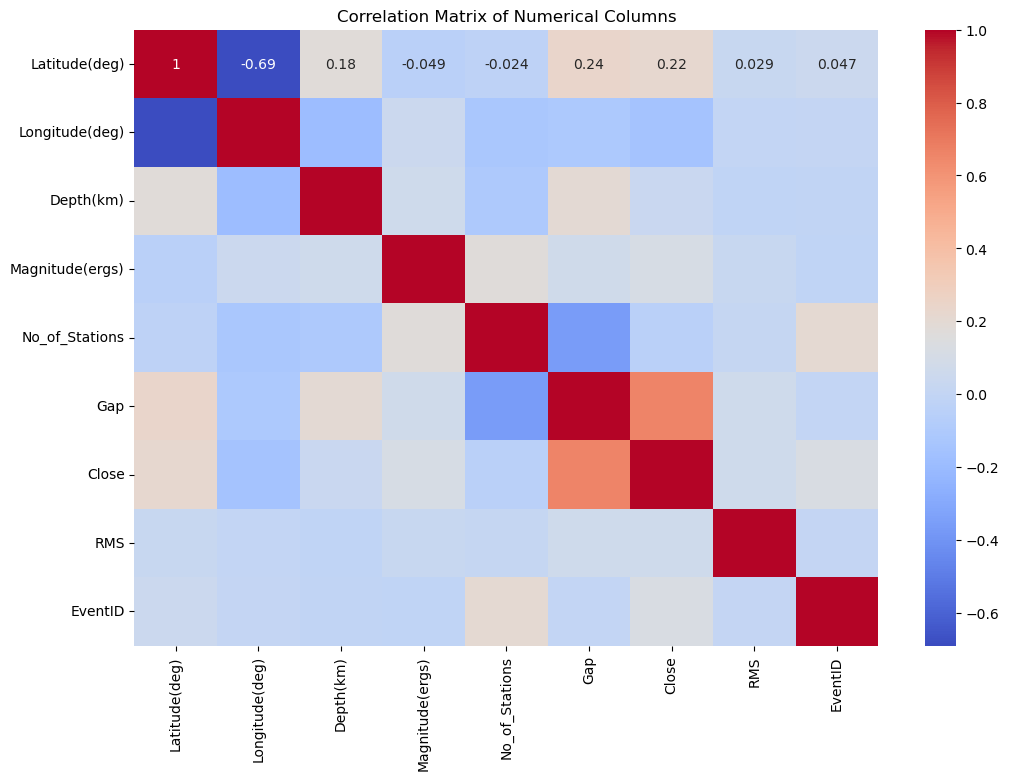

In [10]:
# take only numerical columns
numerical_data = data.drop(columns=['Magnitude_type'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

#ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


Checking Distributions and Stats

c:\Users\PARTHIV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


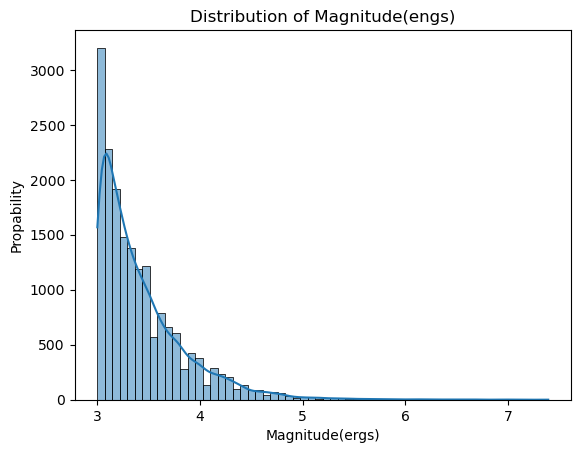

In [11]:
# checking distribution of "Magnitude(ergs)" Target Column

sns.histplot(data['Magnitude(ergs)'],bins=60, kde=True)

plt.title('Distribution of Magnitude(engs)')
plt.xlabel('Magnitude(ergs)')
plt.ylabel('Propability')
plt.show()

In [12]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df['YeoJohnson_Magnitude(ergs)'] = pt.fit_transform(df[['Magnitude(ergs)']])



c:\Users\PARTHIV\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequecy')

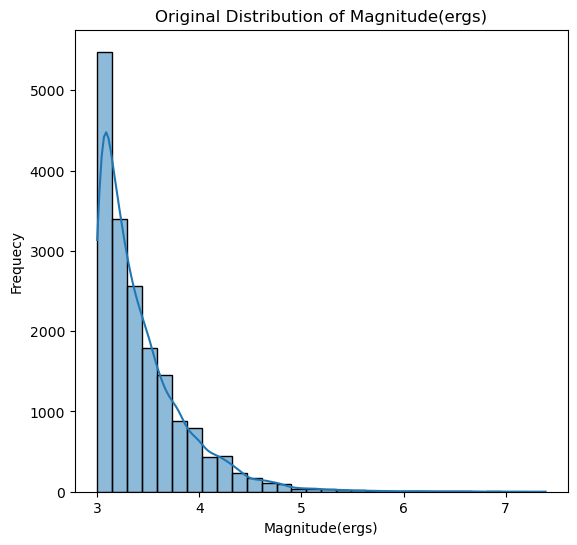

In [13]:


plt.figure(figsize=(14,6))

# KDE of Magnitude(ergs) before Log-Transformation
plt.subplot(1,2,1)
sns.histplot(df['Magnitude(ergs)'],bins=30, kde=True)
plt.title('Original Distribution of Magnitude(ergs)')
plt.xlabel('Magnitude(ergs)')
plt.ylabel('Frequecy')



Min Max Values

In [14]:
n = data[data['Magnitude(ergs)']>6].shape[0]
n

29

Preprocessing  Required Columns

In [15]:
df = pd.get_dummies(df,columns=['Magnitude_type'],prefix='MagType')

# Convert only boolean columns to integers
df[df.select_dtypes(['bool']).columns] = df.select_dtypes(['bool']).astype(int)

# Verify the output
print(df)

                         Latitude(deg)  Longitude(deg)  Depth(km)  \
1966-07-01 09:41:21.820        35.9463       -120.4700      12.26   
1966-07-02 12:08:34.250        35.7867       -120.3265       8.99   
1966-07-02 12:16:14.950        35.7928       -120.3353       9.88   
1966-07-02 12:25:06.120        35.7970       -120.3282       9.09   
1966-07-05 18:54:54.360        35.9223       -120.4585       7.86   
...                                ...             ...        ...   
2007-12-19 12:14:09.620        34.1438       -116.9822       7.03   
2007-12-21 12:14:56.450        37.3078       -121.6735       8.47   
2007-12-23 21:43:43.540        37.2127       -117.8230      10.00   
2007-12-28 01:59:42.400        36.5292       -121.1133       5.99   
2007-12-28 23:20:28.120        38.7710       -122.7370       2.34   

                         Magnitude(ergs)  No_of_Stations  Gap  Close   RMS  \
1966-07-01 09:41:21.820             3.20               7  171     20  0.02   
1966-07-02 12:0

In [16]:
df.sample(3)

,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS,SRC,EventID,YeoJohnson_Magnitude(ergs),MagType_ML,MagType_Md,MagType_Mw,MagType_Mx
1990-02-08 18:16:16.170,40.3108,-124.5052,21.69,3.17,22,229,23,0.08,NCSN,152099,-0.589281,0,1,0,0
1974-02-12 23:30:35.560,37.4990,-121.0432,2.44,3.13,13,153,47,0.09,NCSN,-1018722,-0.779371,0,1,0,0
1999-08-02 05:40:26.500,37.3830,-117.1498,0.04,3.86,36,272,108,0.05,NCSN,21040008,1.252521,0,1,0,0


In [17]:
#Save Pre Processed Column's Excel
file_name = 'Earthquake_data_processed.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


# Finding Feature Importance using Random Forest Algorithm

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_excel(r"D:\Earthquake-prediction-using-Machine-learning-models-main\Dataset\Processed_data\Earthquake_data_processed.xlsx")

# read_csv argument to load date_time column ---> ''', parse_dates=['Date(YYYY/MM/DD)']'''

# df.sample(10)

Train Test Split for Magnitude Prediction


In [20]:
from sklearn.model_selection import train_test_split

# taking all the columns
X = df[['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations','MagType_ML','MagType_Md','MagType_Mw','MagType_Mx','Gap','Close','RMS']]

y = df['Magnitude(ergs)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape,y_train.shape)

(14424, 11) (14424,)


necessary imports

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer , r2_score

In [23]:
random_forest = RandomForestRegressor(n_estimators=100)

random_forest.fit(X_train,y_train)

RandomForestRegressor()

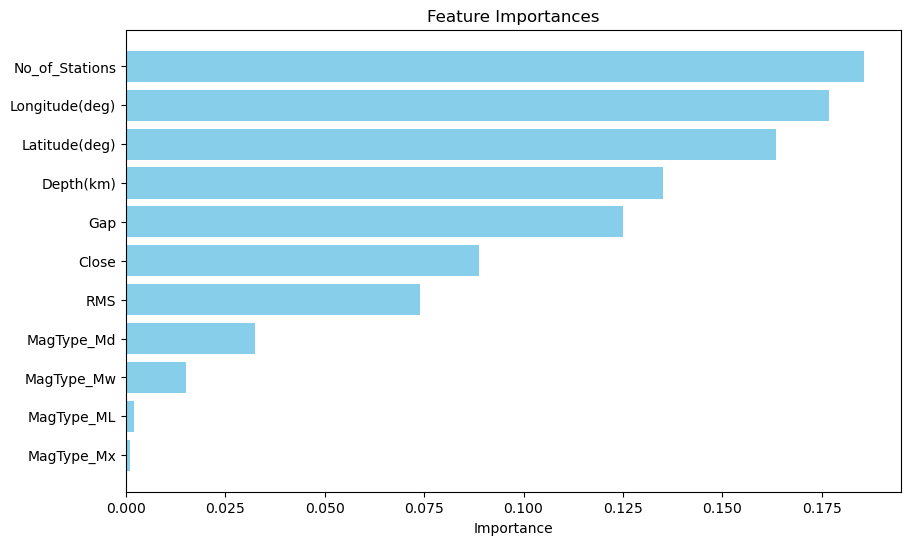

           Feature  Importance
3   No_of_Stations    0.185671
1   Longitude(deg)    0.176763
0    Latitude(deg)    0.163601
2        Depth(km)    0.134990
8              Gap    0.125152
9            Close    0.088900
10             RMS    0.074023
5       MagType_Md    0.032531
6       MagType_Mw    0.015138
4       MagType_ML    0.002096
7       MagType_Mx    0.001136


In [24]:
feature_names = ['Latitude(deg)', 'Longitude(deg)', 'Depth(km)', 'No_of_Stations','MagType_ML','MagType_Md','MagType_Mw','MagType_Mx','Gap','Close','RMS']

feature_importances = random_forest.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

print(importances_df)

In [27]:
import folium

# Initialize a map
m = folium.Map(location=[37.7749, -122.4194], zoom_start=5)

# Add points to the map
for i in range(df.shape[0]-18000):
    folium.Marker(
        location=[df['Latitude(deg)'].iloc[i], df['Longitude(deg)'].iloc[i]]
    ).add_to(m)

# Save map to an HTML file
m.save('map.html')

# To display in a Jupyter notebook
# m

In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


# Create a GeoDataFrame
data = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Latitude(deg)'], df['Longitude(deg)'])
)

# Plot the points
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey')
df.plot(ax=ax, color='red', markersize=50)

# Annotate points with names
for x, y, label in zip(df.geometry.x, df.geometry.y, df['name']):
    plt.text(x, y, label, fontsize=12, ha='right')

plt.show()


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [28]:
data.sample()

,Unnamed: 0,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS,SRC,EventID,MagType_ML,MagType_Md,MagType_Mw,MagType_Mx,geometry
9640,1987-11-17 08:17:46.370,35.8237,-121.0863,6.57,3.0,48,66,3,0.08,NCSN,108504,1,0,0,0,POINT (35.824 -121.086)


In [29]:
df.sample()

,Unnamed: 0,Latitude(deg),Longitude(deg),Depth(km),Magnitude(ergs),No_of_Stations,Gap,Close,RMS,SRC,EventID,MagType_ML,MagType_Md,MagType_Mw,MagType_Mx
4782,1979-12-06 06:58:21.140,40.5428,-125.498,71.45,3.9,10,329,104,0.12,NCSN,-1049192,0,1,0,0
